<style>
header {
    padding: 0.5px;
}
footer {
  padding: 0.5px;
  background-color: #70c6ca;
  color: white;
}
</style>

<div class="header">
    <div style="display:inline-block;vertical-align:top;">
    <img src="../tesis/figuras/logo_ucv.png" width="100" align="left"/>
    </div>
    <div style="display:inline-block;">
    <p>
    Universidad Central de Venezuela<br>
            Facultad de Ciencia<br>
            Escuela de Física
    </p>
</div>
    <p>

<h2 align="center"> Búsqueda de nueva física utilizando técnicas de aprendizaje automático en eventos de múltiples jets </h2>
<h3 align="center"> Análisis comparativo de algoritmos de clasificación en términos de reproducibilidad y rendimiento </h3>



<footer>
   <p style='text-align: left;'> 
       &emsp;<strong>Autor</strong>: Mariana Vivas (<a href="mailto:marianaivivas@gmail.com">marianaivivas@gmail.com</a>)<br>
       &emsp;<strong>Tutores</strong>: Dra. Reina Camacho Toro (LPNHE/CNRS), Dr. José López (UCV) <br>
       &emsp;<strong>Co-tutor</strong>: Dra. Camila Rangel Smith (The Alan Turing Institute)
    </p>
    
</footer>

## Contenido
- Marco teórico
- Aprendizaje automático para la búsqueda de nueva física
- Datos y métodos
- Exploración de datos
- Resultados
- Discusión
- Conclusiones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import argparse
import os.path

# De scikit-learn importamos herramientas
from sklearn.model_selection import train_test_split

# Lo necesario para construir el modelo de tensorflow
import tensorflow as tf
from tensorflow.keras.models import load_model

# Funciones de benchtools
from benchtools.src.plotools import pred_test_hist, image_grid, bkg_sig_scatter
from benchtools.src.clustering import build_features
from benchtools.src.datatools import separate_data
from benchtools.scripts.run import evaluate

# Definimos semillas para la reproducibilidad
tf.random.set_seed(125)
np.random.seed(6)


from IPython.core.display import HTML
#HTML("""
#<style>
#.output_png {
#    display: block;
#    text-align: center;
#    align-items: middle;
#}
#</style>
#""")

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click para mostrar/ocultar las celdas de código."></form>''')

# <font color='#307a71'>Marco teórico</font>

## El modelo estándar
Es la teoría cuántica relativista de de campos que intenta describir las partículas elementales y sus interacciones.

----
El modelo estándar de física de partículas es una de las teorías más exitosas de la física moderna. Intenta clasificar los componentes más fundamentales de la materia y sus interacciones mediante tres de las cuatro fuerzas fundamentales: la interacción electromagnética, la interacción débil y la interacción fuerte. Es una teoría cuántica relativista de campos en la cual las partículas corresponden a excitaciones de campos. 


<figure>
<center><img src="../tesis/figuras/sm-particulas.png" style="width:80%"></center>
<figcaption align = "center"> <small>Fig.1: Contenido de partículas del modelo estándar. Los leptones están organizados de acuerdo a sus generaciones</small></figcaption>
</figure>

---
En el modelo estándar se contemplan dos tipos de partículas: fermiones y bosones, y dos teorías principales: la teoría electrodébil, que incluye la interacción electromagnética y la interacción débil, y la cromodinámica cuántica, que intenta explicar la interacción fuerte.

Los fermiones son los componentes de la materia visible. Poseen espín 1/2 y se rigen por la estadística de Fermi-Dirac. Existen dos tipos: leptones, que interactuan mediante la fuerza electrodébil, y quarks, que interactuán mediante la fuerza fuerte. Los fermiones están organizados en generaciones, como se observa en la Fig.1. Cada generación consta de dos quarks, con carga 2/3 y -1/3, y dos leptones, uno cargado y uno neutro.

Los bosones son las partículas intermediarias de las interacciones, por lo que cada bosón está asociado a una interacción fundamental. Poseen espín entero y se rigen por la estadística de Einstein-Bose. El gluon es la partícula intermediaria de la interacción fuerte, el fotón de la interacción electromagnética y los bosones Z y W de la interacción débil. Por último, el boson de Higgs es la manifestación experimental del campo escalar de Higgs, responsable de dar masa a las partículas del modelo (exceptuando los neutrinos).

## Cromodinámica cuántica
Es la teoría de la interacción fuerte y describe la dinámica de los quarks y gluones.

---
En este trabajo nos interesan los fenómenos relacionados a la interacción fuerte, es decir, nos enfocamos en la cromodinámica cuántica. Como se mencionó anteriormente, la cromodinámica cuántica es la teoría de la interacción fuerte, donde se describe la dinámica de los quarks y gluones. El gluón es el bosón de la teoría, y al igual que los quarks, posee carga de color.

La carga de color es el análogo a la carga eléctrica y es el número cuántico conservado en la teoría. Tanto los quarks como los gluones poseen carga de color. Que los gluones poseean carga de color hace que la teoría sea más complicada, puesto que los gluones presentan interacción propia. 

Los quarks son partículas que se encuentran confinadas en grupos de dos o más quarks y con carga de color neutro, conocidos como hadrones.

Nos interesan particularmente dos características fundamentales de esta teoría: la libertad asintótica y el confinamiento.

<img style="float: right; width:60%" src="../tesis/figuras/qcd-alphas.png">

**Libertad asintótica** 

   La constante de acople $\alpha_s$ disminuye al aumentar la transferencia de momento $Q$ y desaparece asintóticamente.

**Confinamiento**
    
   La fuerza de la interacción aumenta a pequeñas transferencias de momento.
  
<figcaption align = "right"> <small>Fig.2: Resumen de medidas experimentales de $\alpha_s$ en función de la escala de energía $Q$</small></figcaption>

---
En teoría de campos, el acople efectivo hace referencia a la fuerza de la interacción, y esta se ve modificada por la interacción.

La libertad asintótica hace explica una característica observada en las colisiones de hadrones: los quarks en hadrones a altas energías se comportan como partículas libres, es decir, cuando la tranferencia de momento en una colisión es alta, la fuerza de la interacción fuerte disminuye. Esto se observa en la Fig.2, vemos que en valores más a la derecha en el eje x, donde se tiene la transferencia de momento, la constante de acople es menor.

Contrario a la libertad asintótica se tiene el concepto de confinamiento, que justifica por que los quarks se encuentran en grupos. El confinamiento explica que a bajas energias, o pequeña tranferencia de momento, la fuerza de la interacción fuerte aumenta, por lo que los quarks se encuentran estrechamente unidos.

## Formación de jets
<figure>
<center><img src="../tesis/figuras/jets-formacion.png" style="width:100%"></center>
<figcaption align = "center"> <small>Fig.3: Esquema de la formación de jets.</small></figcaption>

---
La libertad asintótica y el confinamiento son los procesos que explican la formación de jets en colisiones de protones a altas energías. Los jets son lluvias colimadas de partículas de color neutro. Debido a la alta tasa de producción de jets en eventos de colisión, se han convertido en objeto de estudio para mejorar la comprensión del modelo estándar, así como para buscar nueva física.

Los procesos involucrados en la formación de jets se pueden observar en la fig. 3:

El proceso de colisión se conoce como **dispersión fuerte**, y es el proceso principal en la formación de jets. Los protones colisionan a altas energías, produciendo una interacción con alta transferencia de momento, donde los quarks y gluones en los protones (llamados también partones) se comportan como partículas libres debido a la libertad asintótica. En este proceso se puede crear una partícula resonante de corta vida o puede suceder un proceso de QCD estándar. A partir del resultado de la colisión se pueden producir decaimientos y/o procesos de QCD, generando otras partículas.

También se considera la **radiación de estado inicial y de estado final**, donde las partículas entrantes y salientes pueden radiar otras partículas.

Por último se encuentran los **eventos subyacentes**, que son las interacciones entre partones que no participan en la dispersión fuerte y que pueden generar otras partículas.

Mediate todos estos procesos se generan partículas que forman una lluvia que se dice colimada porque las partículas se generan a ángulos pequeños del partón original. Una vez que se alcanzan bajas energías el confinamiento domina el proceso, por lo que las partículas creadas se unen para formar partículas de color neutro. Esto se conoce como **hadronización**. A la colección de todos los hadrones resultantes cerca de la dirección del partón original se le llama jet.

## Más allá del modelo estándar
Limitaciones **fenomenológicas**:

- Asimetría materia-antemateria
- Masa de los neutrinos
- Materia oscura y energía oscura

---
A pesar de que se han verificado exitosamente múltiples predicciones hechas a partir del modelo estándar, es evidente que no es una teoría final debido a que no explica varios fenómenos observados experimentalmente. Las limitaciones del modelo estándar se pueden separar en fenomenológicas y teóricas.

Las limitaciones fenomenológicas hacen referencia a observaciones experimentales para las que el modelo estándar no tiene explicación, entre ellas: 
- La asimetría materia-antimateria: de acuerdo al modelo estándar, se esperaría igual cantidad de materia que anti-materia. Sin embargo, se observa mucha más materia que anti-materia.
- La masa de los neutrinos: los neutrinos se suponía que eran partículas no-masivas. Aunque se puede corregir el modelo estándar para que posean masa, no se conoce el mecanismo mediante el cual la obtienen.
- Materia oscura y energía oscura: la existencia de la materia oscura se ha inferido por los efectos gravitacionales que tiene en la materia visible y la energía oscura se utiliza para explicar la tasa de expansión del universo y su aceleración. Sin embargo, la naturaleza de ambas no está incluida en el modelo estándar.

Limitaciones **teóricas**:
- Descripción cuántica de la gravedad
- Origen de las masas/mezclas
- Problema CP fuerte
- Problema de jerarquía

---
Las limitaciones teóricas hacen referencia a predicciones no observadas o valores y parámetros para los que la teoría no tiene explicación. Entre estas se encuentran:
- Descripción cuántica de la gravedad: la gravedad no se encuentra incluida en el modelo.
- Origen de las masas/mezclas: el modelo estándar no explica el origen del mecanismo de Brout–Englert–Higgs, solo se sabe que es necesario para poder coincidir con las observaciones experimentales. Además, las masas de los fermiones y los ángulos de mezcla de los quarks parecen presentar un patrón para el cual no se tiene explicación.
- Problema CP fuerte: En la QCD se predice violación carga-paridad (CP), pero esto no se ha observado experimentalmente.
- Problema de jerarquía: teóricamente la masa del bosón de Higgs debería ser del orden de la escala de Planck. Sin embargo, el valor experimentar hallado es $10^{-19}$ órdenes de magnitud menor.

A partir de estas limitaciones, se han planteado múltiples teorías que intentan responder las preguntas para las que el modelo estándar no tiene explicación. Estás teorías se conocen como teorías más allá del modelo estándar (BSM) y su verificación/refutación es uno de los objetivos del programa del LHC.

### Eventos dijet
Múltiples modelos de física más allá del modelo estándar (BSM) plantean la existencia de nuevas practiculas. Son de particular interés los eventos que decaen a dos jets porque:
- Una alta fracción de los eventos de colisión resultan en jets.
- Varios modelos predicen la existencia de nuevas partículas masivas que decaen a dos jets
- Los jets son la firma experimental de los quarks y gluones, productos en el decaimiento de los bosones *W/Z* y del bosón de Higgs.

---
Particularmente, la búsqueda de nuevas partículas es parte fundamental en en la búsqueda de física BSM. Históricamente, uno de los métodos utilizados para descubrir nuevas partículas es la búsqueda de estructuras de resonancia en espectros de masas invariantes de los productos de desintegración de la partícula.

A diferencia de las búsquedas dirigidas a estados finales más complejos, para una topología específica, las búsquedas de resonancia de dos cuerpos solo son sensibles a dos parámetros: la masa de la nueva partícula y la sección transversal de producción. En este trabajo nos enfocamos en el estado final de dos jets, o dijet.

Varios modelos de física BSM predicen la existencia de nuevas partículas masivas que decaen a dos jets. Además, los jets son la firma experimental de los quarks y gluones, y son productos en el decaimiento hadrónico de los bosones W/Z, y el estado final del decaimiento a quarks del bosón de Higgs. Así, su estudio no está motivado únicamente por la búsqueda de nueva física, sino también para ganar una mejor comprensión de la QCD y del modelo estándar.

## Agrupamiento de jets
La existencia de un jet es dependiente de la regla matemática que lo define. Esta regla matemática agrupa los constituyentes del jet de acuerdo a propiedades cinemáticas.
### Recombinación secuencial
Utilizan las siguientes medidas de distancia entre dos constituyentes:
$$
    d_{ij} = min(p_{Ti}^{2p},p_{Tj}^{2p})\times \frac{\Delta R_{ij}^2}{R}
$$
y la distancia entre el eje del haz y el constituyente detectado:
$$
    d_{iB}=p_{Ti}^{2p}
$$

---
Para poder estudiar los eventos de jets, hace falta reconstruirlos, puesto que lo que se mide de los eventos de jets son características de las partículas de color neutro resultado de la hadronización. 

La definición de un jet no es única. Su existencia es dependiente de la regla matemática que lo define. Esta regla matemática se conoce como algoritmo de agrupamiento de jets. En este trabajo partícularmete, vamos a utilizar un algoritmo de recombinación secuencial.

Los algoritmos de recombinación secuencial asumen que los constituyentes de un jet poseen una pequeña diferencia en el momento transverso. Por esto, las partículas son agrupadas en el espacio de momento.

En general, los algoritmos de recombinación secuencial utilizan las medidas de distancia presentadas en la lámina: la distancia entre dos constituyentes, y la distancia entre el eje del haz y el constituyente detectado. $p_T$ es el momento transverso de las partículas, $\Delta R_{ij} = \sqrt{(\eta_i-\eta_j)^2+(\phi_i-\phi_j)^2}$ es la distancia entre dos constituyentes en el espacio $(\eta-\phi)$, $R$ es el radio final del jet, usualmente entre 0.4-0.7 y $p$ es un parámetro referente al tipo de algoritmo.

**Algoritmos de recombinación secuencial**
<hr> 

**Input:** Constituyentes del evento<br>
1. Hallar el mínimo en el conjunto $\{d_{ij},d_{iB}\}$:<br>
  1. *Si el mínimo es $d_{ij}$*: los constituyentes *i* y *j* se unen en un solo constituyente *ij*, sumando el cuadri-momento y eliminando *i* y *j*  de la lista de constituyentes.<br>
  2. *Si el mínimo es $d_{iB}$*: *i* se considera jet y eliminado de la lista de constituyentes.  

<hr> 

<figure>
<center><img src="../tesis/figuras/presentacion-algrecombinacion.png" style="width:100%"></center>
<figcaption align = "center"> <small>Fig.4: Algoritmos de recombinación secuencial.</small></figcaption>

---
El algoritmo halla el minímo entre la distancia entre constituyentes y la distancia entre el eje del haz y el constituyente. Si el mínimo se halla entre dos constituyentes, se unen en un solo constituyente, se eliminan individualemnte de la lista de constituyentes y se repite le evaluación. Si el mínimo es la distancia entre el eje del haz y el constituyente, se considera que se reconstruyó un jet y se elimina de la lista de constituyentes. Esto se repite hasta que todas las partículas forman parte de un jet o hasta que se tengan una catidad de jets específicos, lo que se conoce como agrupamiento inclusivo y exclusivo, respectivamente.

El algoritmo a utilizar en el trabajo se conoce como **anti-kt**, para el cual p = -1.

## Variables de subestructura
La subestructura de un jet puede analizarse para diferenciar si el jet proviene de un gluon, un quark, un bosón que decae hadrónicamente o partículas masivas aún no descubiertas.

<figure>
<center><img src="../tesis/figuras/jets-diagramajets.png" style="width:75%"></center>
<figcaption align = "center"> <small>Fig.5: Representación de jets producto de: quarks y gluones (arriba a la izquierda), quark bottom (arriba en el centro), y topologías de jets impulsados: bosones de alto $pT$ W y Z (arriba a la derecha), bosón de Higgs (abajo a la izquierda) y quark top (abajo a la derecha) decayendo a un estado final de quarks.</small></figcaption>

---
La suestructura de un jet puede analizarse para diferencias de qué partícula proviene un jet. Como se observa en la fig. 5. A alto momento transverso un bosón, por ejemplo, puede reconstruirse como un jet único debido a que los productos del decaimiento se encuentran muy cercanos. Las variables de subestructura nos ayudan a diferenciar entre jets provinientes de distintos tipos de partículas.

### Masa
La masa de un jet es cercana a la masa de la partícula de la cual se origina, asumiendo que los productos del decaimiento están contenidos en el jet. 

Está definida como la suma de la masa invariante de todos los constituyentes del jet, calculada a partir del cuadri-momento de cada constituyente. 

<figure>
<center><img src="../tesis/figuras/jets-masa.png" style="width:50%"></center>
<figcaption align = "center"> <small>Fig.6: Distribuciones de la masa del jet principal para jets de quarks y gluones, o fondo, y de una señal de nueva física con partículas de 500 y 100 GeV.</small></figcaption>

---
La masa es la variable más evidente para diferenciar entre jets provinientes de distintas partículas puesto que esta va a ser cercana a la masa de la partícula de la cual se origina el jet. 

En la Figura 6 se presenta un ejemplo de la distribución de la masa del jet principal de eventos provenientes de quarks y gluones, o fondo, y para una señal de nueva física con partículas de 500 y 100 GeV que decaen a jets.

### N-subjettiness
Esta variable intenta diferenciar jets de acuerdo al número N de subjets que lo conforman utilizando $\tau_N$.

Usualmente se utilizan variables adimensionales variables adimensionales $\longrightarrow$ $\tau_{N,N-1}=\frac{\tau_{N}}{\tau_{N-1}}$

<figure>
<center><img src="../tesis/figuras/jets-tau.png" style="width:45%"></center>
<figcaption align = "center"> <small>Fig.7: Distribuciones de $\tau_{21}$ para jets de quarks y gluones, o fondo, y de una señal de nueva física con jets que tienen subestructura de 2 o más jets.</small></figcaption>

---
N-subjettiness diferencia entre jets por el número N de subjets que conforman a un jet. Para esto se hace un agrupamiento exclusivo de N jets y se calcula $\tau_N$. Un valor menor de $\tau_N$ corresponde a una cantidad de subjets igual o menor, mientras que un mayor valor indica más de N subjets. 

Se suelen utilizar variables adimensionales como $\tau_{N,N-1}$. Un jet con N-1 subjets tendrá un valor de $\tau_{N,N-1} mayor a un jet conformado por N o más subjets. 

En la fig. 7, se presenta un ejemplo de la distribución de  para jets provenientes de quarks y gluones, o fondo, y para una señal de nueva física que decae a jets con una subestructura de 2 o más subjets.

($\tau_N$: la suma corre sobre todos los constituyentes de cada jet de momento $pT_i$ y distancia angular $\Delta R_{min,i}$ entre el constituyente y los ejes de los jets. $d_0$ es la suma de momento de todos los constituyentes multiplicada por el radio del jet.)

# <font color='#307a71'>Aprendizaje automático para la búsqueda de nueva física</font>

## Aprendizaje automático
El aprendizaje automático es un subcampo de la inteligencia artificial que tiene como objetivo el desarrollo de algoritmos que mejoran su desempeño de manera cuantificable en una tarea determinada.

Hay dos tipos principales de tareas: clasificación y regresión. Estas pueden ser supervisadas y no supervisadas.

<figure>
<center><img src="../tesis/figuras/presentacion-sup-unsup.png" style="width:80%"></center>
<figcaption align = "center"> <small>Fig.8: Ejemplo de clasificación por algoritmo supervisado y no supervisado</small></figcaption>

---
En partícular, nos interesa la tarea de clasificación binaria, donde los algoritmos intentan distinguir entre dos clases.

Como se ve en la fig. 8, el aprendizaje no supervisado trata de clasificar elementos con características iguales, sin ningún conocimiento sobre la clase a la que pertencen, es decir, sin etiquetas. Por otra parte, el aprendizaje supervisado utiliza las etiquetas para aprender a clasificar elementos similares.

### Aprendizaje automático en HEP

---
El uso de aprendizaje automático en HEP es amplio. Sin embargo, este trabajo se enfoca en las técnicas de detección de anomalías y búsquedas libres de modelo.

#### Detección de anomalías
La tarea de detección de anomalías tiene como objetivo predecir la categoría a la que pertenece una muestra: "normal" o "anómala"

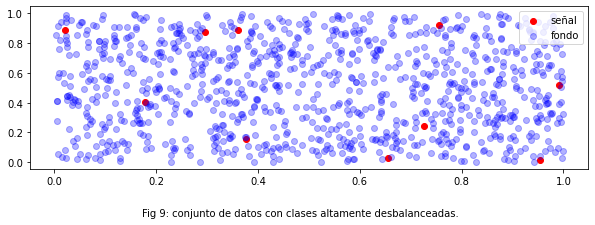

In [10]:
# Imagen detección anomalias
# Creando las etiquetas con el ratio de BB1
label = np.random.choice([0, 1], size=1000, p=[.992, .008])
# Creamos los datos 
xaxis=np.random.rand(1000)
yaxis=np.random.rand(1000)
# Creamos un df con los datos
df = pd.DataFrame(np.stack((xaxis, yaxis, label), axis=1), columns=['x-axis','y-axis','label'])

# Graficamos
fig, ax = plt.subplots(facecolor='white', figsize=[10,3])
# Separamos en señal y fondo
sig = df.loc[df['label']==1]
bkg = df.loc[df['label']==0]
# Plots
ax.scatter(sig['x-axis'], sig['y-axis'], c='r', alpha=1, label='señal')
ax.scatter(bkg['x-axis'], bkg['y-axis'], c='b', alpha=0.3, label='fondo')
# Información
plt.legend(loc='upper right')
txt="Fig 9: conjunto de datos con clases altamente desbalanceadas."
plt.figtext(0.5, -0.09, txt, wrap=True, horizontalalignment='center', fontsize=10);
plt.show()

---
En HEP se habla de detección de anomalías porque las clases se encuentran altamente desbalanceadas: hay un porcentaje muy bajo de una clase con respecto a la otra. En la fig. 9 se muestra visualmente un ejemplo donde hay 0.8% de señal en una muestra, uno de los casos que se trata en este trabajo. Hasta ahora, parte de la dificultad en la búsqueda recae en que hay muy pocos eventos de interés para la gran cantidad de fondo.

#### Búsquedas independientes de modelo
- *Libre de modelo*: sin suposiciones sobre las densidades
- *No paramétrica*: compara las densidades como un todo.
- *No clasificada*: usa la dimensionalidad completa de la información.

---
Con la introducción del aprendizaje automático se han propuesto métodos para búsquedas de nueva física que puedan buscar de manera general, es decir, que no busque específicamente una partícula, si no que busquen un tipo de partícula con algunas características generales. El objetivo de estas búsquedas es que sean lo más agnósticas posibles al proceso físico subyacente que puede ser responsable de la señal de nueva física.

Idealmente se quiere que las búsquedas sean libres de modelo, no paramétricas y no clasificadas.

## Olimpiadas LHC 2020
En las olimpiadas se simulan datos que podrían generarse en el acelerador. Los participantes interpretan los datos, buscando partículas y evidencia de teorías que no se han presenciado o confirmados. 

Las olimpiadas de 2020 estuvieron enfocadas en el uso de aprendizaje automático para búsqueda de anomalías en eventos con un estado final de múltiples jets.

<figure>
<center><img src="../tesis/figuras/lhco-topologia.png" style="width:55%"></center>
<figcaption align = "center"> <small>Fig.10: Un tipo de topología que se puede encontrar en los datos de las LHCO 2020. Evento dijet por el decaimiento de una partícula de nueva física en dos partículas de nueva física que decaen a jets</small></figcaption>

---
El uso de estas herramientas para este tipo de búsquedas se ha estudiado en los últimos diez años. Un ejemplo de esto son las olimpiadas LHC 2020, un evento dedicado al estudio de aprendizaje automático para buscar nueva física utilizando técnicas de detección de anomalías. En este evento se utilizaron datos simulados de eventos que podrían generarse en los aceleradores y el objetivo es que los participantes interpreten los datos buscando nuevas partículas.

Estas olimpiadas estuvieron enfocadas en eventos con un estado final de múltiples jets y proporcionaron tres conjuntos de datos, o cajas negras, disponibles para participar, donde cada caja negra podía contener o no eventos de nueva física.

### Resultados LHCO 2020
Los participantes debían reportar el número de eventos de señal, una descripción de la nueva física y un valor p asociado a la hipótesis nula.

---
Cada equipo participante reportó el número de eventos de señal en los datos, una descripción de la nueva física y/o la probabilidad de que en el conjunto no hubieran nuevas partículas. En el artículo común se explicó el método utilizado y los resultados obtenidos. Sin embargo, no hubo una métrica común a reportar para comparar el rendimiento de los modelos en la tarea de detecció de anomalías.

#### Reproducibilidad
<center><img src="../tesis/figuras/alglhco-repfig.png" style="width:60%"></center>
<figcaption align = "center"> <small>Fig.11: Resumen de la reproducibilidad de los participantes de las LHCO 2020.</small></figcaption>

---
Además, el uso de estas herramientas requiere nuevas consideraciones sobre la reproducibilidad científica, es decir, la información necesaria para reproducir resultados. En este caso, hubieron 18 equipos participantes, de los cuales solo uno proporcionó información "suficiente" para reproducir lo obtenido. En la fig. 11 se muestra la cantidad de equipos que cumplieron con algunas características a tomar en cuenta a la hora de hacer una investigación utilizando aprendizaje automático.

El preprocesamiento hace referencia a la información acerca de como se realizó el preprocesamiento de los datos utilizados por los modelos. El código se refiere a si se encontraba públicamente disponible el código utilizado por los participantes. Las instrucciones indican si se publicó información de como usar el código. El entorno se apunta a si se encontraba disponible información sobre el entorno computacional utilizado: versiones de librerias, hardware. Y la licencia indica cuántos grupos participantes le colocaron una licencia de uso a su trabajo, para saber como utilizarlo y compartirlo correctamente.

Estas consideraciones son importantes para este trabajo porque el objetivo fue reproducir el resultado de dos algoritmos de las olimpiadas para hacer una comparación directa entre ellos y con modelos más simples que no están enfocados en la búsqueda de nuevas partículas.

## Barreras para la investigación reproducible
<img style="float: right; width:60%" src="../tesis/figuras/presentacion-turing.png">

- Estructura actual de la <br> investigación académica

- Desafios técnicos

- Percepciones de los <br> científicos de datos

#### <font color='mediumTurquoise'>The Turing Way</font>

Es una guía con la información que los investigadores y científicos de datos necesitan para garantizar que los proyectos en los que trabajan sean fáciles de reproducir y reutilizar.

<figcaption align = "right"> <small>Fig.12: Fig: Proyecto The Turing Way. Zenodo. <br> http://doi.org/10.5281/zenodo.3332807¶</small></figcaption>

---
Sin embargo, entendemos que existen múltiples barreras que dificultan hacer investigación reproducible. Entre estas encontramos la estructura actual de la investigación científica, donde publicar todos los pasos de una investigación es desalentado porque hay mayor posibilidad de hallar errores o son sujetas a mayores estándares. Los desafios técnicos, relacionados a la gran cantidad de datos que se utilizan y la complejidad de los análisis, dificultan hacer investigaciones reproducibles utilizando estas herramientas. Además, consideramos las percepciones de los científicos de datos sobre que hacer un trabajo reproducible puede ser más complicado o que hay que aprender nuevas herramientas.

Sin embargo, todos estos puntos incluyen los beneficios de hacer ciencia de datos: la facilidad para encontrar errores también es beneficiosa porque se encuentran errores más facilmente en etapas iniciales, se permite una mayor complejidad del analisis porque se comprende más facilmente, además la investigación reproducible es requerida hoy en día por múltiples organizaciones debido a que resulta en investigaciones de mayor calidad, que pueden ser utilizadas más fácilmente por la comunidad científica.

Todos estos puntos están discutidos en The Turing Way, una guía sobre investigación abierta y reproducible, que incluye información sobre las herramientas necesarias y consideraciones a tomar a la hora de hacer proyectos de investigación utilizando herramientas como el aprendizaje automático.

# <font color='#307a71'>Datos y métodos</font>

## Conjuntos de datos
Cada evento está compuesto por una lista de todos los hadrones y su cinemática<br> ($p_T,\eta,\phi$). La señal de los conjuntos es $Z'\rightarrow XY$, donde $Z'$, $X$ y $Y$ son partículas BSM.

<img style="float: right; width:60%" src="../tesis/figuras/lhco-RnD.png">

### R&D
Este conjunto contiene 9.09% de eventos de señal con masas:

$Z'=3.5$ TeV<br> $X=500$ GeV<br> $Y=100$ GeV.

### BB1
Este conjunto contiene 0.083% de señal con masas:

$Z'=3.823$ TeV<br> $X=732$ GeV<br> $Y=378$ GeV.

<figcaption align = "right"> <small>Fig.13: Diagrama de Feynmann para la señal del conjunto R&D y la BB1.</small></figcaption>

---
En este trabajo se utilizaron dos conjuntos de datos proporcionados por las LHCO 2020. Cada conjunto contiene una lista de la cinemática de los hadrones resultado de un evento de dos jets. Cada evento con hasta 700 hadrones.

En ambos conjuntos se tiene una señal de la forma $Z'\rightarrow XY$, como se observa en la figura 13, donde el producto de la colisión es un bosón Z' de nueva física que decae a dos partículas de nueva física X y Y. Sin embargo, los conjuntos difieren en las masas de las partículas y la proporción de señal.

Particularmente, el conjunto R&D fue el utilizado por los algoritmos para entrenar los modelos y el conjunto BB1 fue el primer conjunto publicado para participar.

## Algoritmos para detección de anomalías
La implementación de aprendizaje automático en este trabajo está comprendida por:
1. Pre-procesamiento de los datos.
2. División de los datos en conjuntos de entrenamiento y prueba.
3. Ajuste de los modelos utilizando los datos de entrenamiento.
4. Evaluación del rendimiento del modelo con los datos de prueba.

---
En este trabajo se implementarion varios algoritmos simples para detección de anomalías con el fin de compararlos con dos algoritmos de las LHCO 2020. La implementación del aprendizaje automático a nivel general consta de cuatro partes.

Los algoritmos utilizados en este trabajo se escogieron a partir de su rendimiento, estudiado durante el desarrollo de las herramientas de análisis de datos.

| Modelos                             | Tipo de aprendizaje |
|:------------------------------------|:-------------------:|
| Bosque aleatorio                    | Supervisado         |
| Potenciación del gradiente          | Supervisado         |
|Análisis de discriminante cuadrático | Supervisado         |
| Redes neuronales                    | Supervisado         |
| KMeans                              | No supervisado      |
| Codificador automático              | No supervisado      |
| Red Generativa Antagónica           | No supervisado      |

---
Se escogieron algoritmos implementados en la librería de python `scikit-learn` y se construyó un modelo sencillo utilizando `tensorflow`. A continuación se explicarán brevemente estos modelos, y algunos principios necesarios para entender más adelante los modelos escogidos de las LHCO 2020.

## Algoritmos supervisados

### Bosque aleatorio
Basado en un ensamble de múltiples árboles de decisión, donde la decisión final se obtiene promediando las predicciones probabilísticas.
<center><img src="../tesis/figuras/ml-bosquealeatorio.png" style="width:60%"></center>
<figcaption align = "center"> <small>Fig.14: Representación visual del funcionamiento de un bosque aleatorio</small></figcaption>

---
Los bosques aleatorios son algoritmos son ensambles de árboles de decisión. Los métodos de ensamble utilizan conjuntos de algoritmos de aprendizaje automático cuyas decisiones se combinan para mejorar el rendimiento del sistema en general.

En este caso los algoritmos de aprendizaje automático son arboles de decisión. Estos utilizan una serie de preguntas para realizar la partición jerárquica de los datos con el objetivo de hallar un conjunto de reglas que separen el espacio de características.

Para crear un ensamble de árboles de decisión y obtener un bosque aleatorio se forman múltiples árboles simples con subconjuntos de los datos de entrenamiento y cada árbol emite un voto unitario para la clase más popular dada una entrada. Finalmente, la clase con más votos es asignada a esta entrada, como se observa en la figura 14. Sin embargo, la implementación utilizada en este trabajo combina los árboles individuales promediando su predicción probabilística.

### Potenciación del gradiente
Ensamble de árboles de decisión, donde cada árbol se ajusta al error asociado al árbol anterior, con el objetivo de minimizarlo.
<center><img src="../tesis/figuras/ml-gbc.png" style="width:60%"></center>
<figcaption align = "center"> <small>Fig.15: Ilustración del funcionamiento de GBC</small></figcaption>

---
El algoritmo de potenciación de gradiente (GBC, por sus siglas en inglés) también se construye mediante un ensamble de arboles de decisión, utilizando un método conocido como impulso. En este caso, en vez de entrenar múltiples árboles de decisión paralelamente, se entrena cada árbol para minimizar el error del árbol anterior, partiendo de la idea de que hallar varias reglas generales aproximadas puede ser más sencillo que hallar una regla general altamente precisa.

### Análisis de discriminante cuadrático
Es un clasificador con un límite de decisión cuadrático. El modelo asume que las densidades condicionales de clase $P(x|y=k)$ para cada clase $k$ están distribuidas normalmente.
<center><img src="../tesis/figuras/ml-qda.png" style="width:90%"></center>
<figcaption align = "center"> <small>Fig.16: Clasificación con QDA. a) Los puntos a ser clasificados, b) los límites o fronteras de decisión. La barra de color indica la probabilidad de pertenecer a la clase 1.</small></figcaption>

---
El análisis de discriminante cuadrático (QDA, por sus siglas en inglés) es un clasificador supervisado con un límite de decisión cuadrático. El modelo asume que las densidades condicionales de clase para cada clase están distribuidas normalmente. Las predicciones para cada muestra de entrenamiento se obtienen utilizando el teorema de Bayes

### Redes neuronales
Se definen mediante una serie de transformaciones que mapean la entrada a estados «ocultos». Finalmente, una última transformación mapea estos estados a una función de salida. Las transformaciones se ordenan en capas y se pueden escribir matemáticamente como $ \mathbf{h}_i = g_i(W_i\mathbf{h}_i+\mathbf{b}_i)$.
<br>
<br>
<center><img src="../tesis/figuras/presentacion-nn.png" style="width:60%"></center>
<figcaption align = "center"> <small>Fig.18: Diagrama de una red neuronal. Las transformaciones se ordenan por capas, donde la salida de una capa es la entrada de la siguiente.</small></figcaption>

---
Las redes neuronales se definen mediante una serie de transformaciones que mapean la entrada a uno o más estados ocultos hasta una última transformación que mapea los datos a la función de salida. Esto también se conoce como perceptron múlticapas.

Las transformaciones se pueden escribir matemáticamente como: $ \mathbf{h}_i = g_i(W_i\mathbf{h}_i+\mathbf{b}_i)$, donde $g_i$ es una función conocida como *función de activación* y $\mathbf{h}_i$ representa la transformación iésima de $\mathbf{x}$, llamada *encaje*. $W$ es la matriz de los *pesos* y $\mathbf{b}$ el vector de los *sesgos*. El objetivo es hallar los pesos y sesgos que optimizan la función de pérdida.

La tarea de la red depende de su arquitectura. Aunque su uso es extenso, nos enfocaremos en su aplicación para clasificación binaria, donde la última transformación es la entropia binaria cruzada.

## Algoritmos no supervisados

### KMeans
Es un algoritmo que separa los datos en grupos con igual varianza. Los grupos están caracterizados por la media de los datos pertenecientes al grupo. Estos se conocen como «centroides».

<center><img src="../tesis/figuras/ml-kmeans.webp" style="width:45%"></center>
<figcaption align = "center"> <small>Fig.19: Distintas inicialización de KMeans en los mismos datos.</small></figcaption>

---
KMeans es un algoritmo de agrupamiento que separa los datos en K grupos con igual varianza. Los grupos están caracterizados por la media de los datos pertenecientes al grupo y estos se conocen como «centroides».

El algoritmo funciona mediante los siguientes pasos:
1. Escoger los centroides. En la primera inicialización se escogen puntos aleatorios de los datos.
2. Asignar cada muestra al centroide más cercano, minimizando la inercia.
3. Crear nuevos centroides tomando el valor medio de todas las muestras asignadas a cada centroide anterior.
4. Calcular la diferencia entre los centroides anteriores y los nuevos.

Los últimos tres pasos se repiten hasta que la diferencia entre los centroides esté debajo de un umbral, es decir, hasta que los centroides no se muevan significativamente.

### Codificador automático
Son redes neuronales que mapean una entrada a una representación comprimida en un encaje, o espacio latente, y luego vuelve a sí misma. Al aprender como reproducir la salida original, el modelo extrae características de los datos de entrada.
<center><img src="../tesis/figuras/alg-ae.png" style="width:55%"></center>
<figcaption align = "center"> <small>Fig.20: Diagrama del funcionamiento de un codificador automático. La entrada se mapea a una representación de dimensionalidad reducida y luego es reconstruida.</small></figcaption>

---
Los codificadores automáticos (AE, por sus siglas en inglés) son redes neuronales de aprendizaje no supervisado que mapean una entrada a una representación comprimida en un encaje, o espacio latente, y luego vuelve a sí misma. La red se puede dividir en dos, el codificador que comprime los datos a un espacio latente, o de menores dimensiones, y el decodificador que los reconstruye.  Una medida de qué tan bien funciona el codificador es la diferencia entre la entrada y la salida de acuerdo a alguna métrica de distancia conocida como «error de reconstrucción».

Este algoritmo se ha empezado a utilizar en HEP como detector de anomalías puesto que, se enfoca en aprender las características de de los datos mayoritarios, y se espera que un evento de señal no sea reconstruido correctamente. Así, se puede utilizar un corte en el error de reconstrucción como un umbral de anomalía.

### Red generativa antagónica
Está basada en modelado generativo y en conceptos de teoría de juegos. Una GAN se construye a partir de dos redes neuronales conocidas como *generador* y *discriminador*. El discriminador se entrena para diferenciar entre las muestras sintéticas y los datos reales y el generador para engañar al discriminador.
<center><img src="../tesis/figuras/presentacion-gan.png" style="width:70%"></center>
<figcaption align = "center"> <small>Fig.21: Diagrama del funcionamiento de una red generativa antagónica. El generador aprende a producir datos para engañar al discriminador.</small></figcaption>

---
Una red generativa antagónica (GAN, por sus siglas en inglés) está basada en modelado generativo y en conceptos de teoría de juegos.

El modelado generativo es una tarea de aprendizaje no supervisado en la que los modelos aprenden automáticamente regularidades o patrones en los datos de entrada, con el objetivo de generar nuevos ejemplos que podrían haberse extraído del conjunto de datos original.

Una GAN se construye a partir de dos redes neuronales conocidas como generador y discriminador. El discriminador se entrena para diferenciar entre las muestras sintéticas y los datos reales y el generador para engañar al discriminador. Los modelos se entrenan juntos hasta que el discriminador es engañado una cantidad de veces sobre algún umbral, lo que significa que el generador está generando ejemplos plausibles.

## Algoritmos LHCO 2020
De los algoritmos participantes, se escogieron **UCluster** y **GAN-AE** porque cumplen con las características de reproducibilidad necesarias y proporcionaron la información de manera simple.

| Nombre | Preprocesamiento | Código| Instrucciones | Entorno| Licencia|
|:------:|:-----------------:|:-----:|:-------------:|:------:|:-------:|
| GAN-AE |$\checkmark$ |$\checkmark$ |$\checkmark$ |$\checkmark$ |- |
|UCluster|$\checkmark$ |$\checkmark$ |$\checkmark$ |$\checkmark$ |$\checkmark$ |

### UCluster
La objetivo principal de UCluster es **reducir la dimensionalidad de los datos** para retener las características principales del evento de colisión **para luego agrupar puntos con características similares en este espacio reducido** o latente.

Para la reducción de dimensiones:
- Se utiliza una red neuronal.
- Se hace una *clasificación de masa de jet por partícula*.

El algoritmo consta de dos tareas: una de clasificación y una de agrupamiento, por lo que la función de pérdida consta de dos partes:
- La pérdida focal.
- La pérdida respecto al agrupamiento.

---
Para la representación reducida se utiliza una red neuronal, sin embargo el método es independiente de la arquitectura de la red neuronal. El método consiste en hacer una *clasificación de masa de jet por partícula*, donde a cada partícula perteneciente a un jet se le asigna una etiqueta proporcional a la masa del jet al que pertenece. El modelo debe aprender la masa del jet al que la partícula pertenece y cuáles partículas pertenecen al mismo jet. El algoritmo utiliza las primeras 100 partículas asociadas a los dos jets más masivos de cada evento.

El algoritmo consta de dos tareas: una de clasificación y una de agrupamiento. Una parte de la función de pérdida consta de la pérdida focal, que es similar a la entropia binaria cruzada utilizada por las redes neuronales en problemas de clasificación binaria, y la pérdida con respecto al agrupamiento, similar a la inercia utilzada por KMeans.

### GAN-AE
GAN-AE es un método que intenta una red neuronal con un codificador automático como una red generativa antagónica. La red discriminate es un perceptrón multicapas y el codificador automático.

1. La red discriminante se entrena con una mezcla de eventos originales y reconstruidos por el codificador.
2. El codificador automático se entrena en función de qué tan bien engaña a la red discriminante.
3. Se evalúa el codificador con una figura de mérito que indica qué tan bien engaña a la red discriminante.
4. Una vez que la figura de mérito es cercana a cero se descarta la red discriminante y se utiliza la distancia euclídea media como característica discriminativa.

---
La red discriminate es un perceptrón multicapas, inicialmente entrenado en una muestra mezclada de eventos reconstruidos por el codificador automático y originales con el objetivo de exponer las debilidades del codificador automático. 

El codificador automático es entrenado utilizando una función de pérdida que combina la reconstrucción del error, en este caso, la distancia euclídea media (MED, por sus siglas en inglés) entre la entrada y la salida y la entropía binaria cruzada. La función de pérdida del codificador incluye un término que se evalúa dando eventos reconstruidos a la red discriminativa, pero esta vez con la etiqueta «equivocada», con el objetivo de engañarla.

Por último, se evalúa el codificador automático utilizando una figura de mérito que cuando es cercana a cero indica que el codificador automático engaña mejor al MLP. Cuando esto sucede, se descarta el discriminante y el codificador automático utiliza la distancia euclidea media entre la entrada y la salida como característica discriminativa.

Los participantes utilizaron este método en conjunto con BumpHunter, un algoritmo que compara la distribución de los datos con datos de referencia y evalúa el valor p y la significancia de cualquier desviación. Sin embargo, la implementación en este trabajo se limita al uso del algoritmo GAN-AE, que es la parte de clasificación binaria de este método.

## Métricas de rendimiento
La métrica de evaluación primaria es la matriz de confusión.
<center><img src="../tesis/figuras/met-matrizconfusion.png" style="width:100%"></center>
<figcaption align = "center"> <small>Fig.22: Matriz de confusión.</small></figcaption>

---
Para medir el rendimiento de los algoritmos vamos a utilizar métricas relacionadas a la clasificación binaria.

La métrica principal es la matriz de confusión. En esta matriz se resumen el número de etiquetas predichas correctamente e incorrectamente. La diagonal en la matriz de confusión representa las etiquetas predichas correctamente, mientras que los elementos fuera de la diagonal son las predicciones incorrectas. A partir de los valores de esta matriz se definen el resto de las métricas.

### Métricas numéricas
| Métrica      | Ecuación &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;| Enfoque de evaluación   |
|:------------|:---------------------------:|:-------------------------|
| Exactitud    | $\frac{TP+TN}{TP+FP+FN+TN}$ | Número correcto de predicciones sobre todas las predicciones hechas |
| Precisión    | $\frac{TP}{TP+FP}$ | Proporción de tasa de verdaderos positivos |
| Recuperación | $\frac{TP}{TP+FN}$ | Efectividad del clasificador para identificar etiquetas positivas |
| Especificidad| $\frac{TN}{TN+FP}$ | Efectividad del clasificador para identificar etiquetas negativas |
| Puntaje f1 | $\frac{2\text{precisión}\times\text{recuperación}}{\text{precisión}+\text{recuperación}}$ | Promedio ponderado de precisión y sensibilidad |
| Exactitud balanceada| $\frac{\text{recuperación}+\text{especificidad}}{2}$| Promedio de la proporción de predicciones correctas de cada clase |

### Métricas bidimensionales

- Los clasificadores asignan un puntaje $\mathcal{D}$ $\longrightarrow$ puntuación más alta significa mayor probabilidad de ser señal
- La clasificación discreta se logra escogiendo un *punto de operación* $\mathcal{D}_{thr}$ $\longrightarrow$ si $\mathcal{D}\geq\mathcal{D}_{thr}$ se clasifica el evento como señal.

---
Los clasificadores binarios no asignan directamente la etiqueta a los eventos, más bien calculan un puntaje relacionado a la probabilidad de ser señal. La clasificación discreta se logra escogiendo un umbral de decisión: valores mayores que ese umbral pertenecen a la señal.

Las métricas bidimensionales miden el rendimiento de los modelos en distintos umbrales de decisión, permitiendo un mayor rango en la evaluación.

<div class="alert alert-info">
  <strong>Nota:</strong> los clasificadores de agrupamiento no asignan puntuaciones, asignan distancias entre los datos y los centroides. En este trabajo, se tomó la distancia hacia el centroide de señal como el puntaje relacionado a la probabilidad de ser señal.
</div>

---
Sin embargo, los clasificadores de agrupamiento como KMeans y UCluster, al agrupar los datos, no proporcionan un puntaje o probabilidad. En este trabajo se tomó la distancia al centroide de señal como puntaje relacionado a la probabilidad de ser señal: mientras los datos estén más cerca del centroide, más probable que sean señal.

Las métricas bidimensionales más conocidas son la curva característica de funcionamiento del receptor (curva ROC, por sus siglas en inglés) y la curva precisión-recuperación (curva PR).

### Curva de funcionamiento del receptor (ROC)
La curva ROC se construye graficando la recuperación vs. 1-especificidad para varios umbrales de decisión. 
<center><img src="../tesis/figuras/ml-roc.png" style="width:45%"></center>
<figcaption align = "center"> <small>Fig.23: La diagonal representa a un clasificador aleatorio o que no distingue entre clases. En este caso, el clasificador con la curva azul es mejor distinguiendo entre clases.</small></figcaption>

---
La curva ROC se construye graficando la recuperación vs. 1-especificidad para varios umbrales de decisión. En términos de HEP, la eficiencia de señal vs. la eficiencia de fondo. Como se observa en la figura 23, el clasificador es mejor a medida que la curva se acerca a la esquina superior izquierda, donde la tasa de verdaderos positivos o la eficiencia de señal es uno y los falsos positivos en cero. La diagonal representa un clasificador aleatorio. Una curva debajo de la diagonal significa que se está realizando la clasificación inversa.

El *área bajo de la curva* (AUC, por sus siglas en inglés) representa la habilidad del clasificador para distinguir entre clases. Un valor de AUC de 0.5 indica que la predicción no es mejor que una clasificación aleatoria. Menor a 0.5 indica que el clasificador está clasificando de manera inversa

### Variaciones de la curva ROC
En HEP se utilizan versiones de esta curva: la curva de *eficiencia de señal* vs. *rechazo de fondo* e *inverso de la eficiencia de fondo* vs. *eficiencia de señal*

<center><img src="../tesis/figuras/ml-otrasroc.PNG" style="width:100%"></center>
<figcaption align = "center"> <small>Fig.24: Ejemplos de otras versiones de la curva ROC.</small></figcaption>

---
En HEP se utilizan variaciones de esta curva: eficiencia de señal vs. rechazo de fondo  y eficiencia de fondo vs. el inverso de la eficiencia de fondo. 

La curva ROC y el AUC tienen sus limitaciones:

- La comparación de dos curvas ROC que se cruzan no es tan evidente, ya que el AUC se construye como una integral que otorga el mismo peso a todas las partes de la curva. Sin embargo, para la clasificación se escoge un punto específico. En este caso, otras métricas se deben utilizar para definir cuál clasificador proporciona mejor rendimiento en la región donde se elija el umbral de decisión.

- El uso de las curvas ROC puede no ser apropiado para problemas que incluyan datos altamente desbalanceados, debido a que conduce a evaluaciones demasiado optimistas. La curva PR puede ser más informativa en este caso.

### Curva Precisión-Recuperación (PR)
Para datos altamente desbalanceados se suele sugerir el uso de la curva PR, donde se grafica la precisión vs. la recuperación.
<center><img src="../tesis/figuras/ml-curvapr.png" style="width:40%"></center>
<figcaption align = "center"> <small>Fig.25: Ejemplos de curvas precisión-recuperación.</small></figcaption>

---
La curva PR se suele sugerir para datos altamente desbalanceados porque cambia al cambiar la distribución de clases, contrario a la curva ROC. La curva PR es mejor a medida que se acerca a la esquina superior derecha. 

Análogo al AUC, se utiliza la *precisión promedio* (AP, por sus siglas en inglés). La precisión promedio resume la curva PR utilizando la media ponderada de las precisiones logradas en cada umbral, usando como peso el aumento en recuperación del umbral anterior

### Mejora de la significancia
Está definida como:
$$
    \text{Mejora de la significancia} = \frac{\epsilon_s}{\sqrt{\epsilon_b}}
$$
Una mejora de la significancia igual a 2 significa que la mejora de la significancia inicial es amplificada por un factor de 2 después de utilizar la estrategia de clasificación.

<center><img src="../tesis/figuras/ml-significancia.PNG" style="width:40%"></center>
<figcaption align = "center"> <small>Fig.26: Ejemplo de curva de mejora de la significancia.</small></figcaption>

La mejora de la significancia ayuda a visualizar la significancia pra distintos umbrales. La significancia estadística nos ayuda a cuantificar si un resultado probablemente se deba al azar o a algún factor de interés.

## ✨ Benchtools ✨
Es un paquete de software desarrollado en python con herramientas para el manejo de datos de eventos de jets. Incluye funciones para:
- Manejo de grandes cantidades de datos.
- Calcular variables cinemática y de subestructura de los jets.
- Agrupar jets y calcular variables cinemáticas.
- Graficar datos con dos clases.
- Calcular métricas de rendimiento de algoritmos de clasificación binaria.

Y un *pipeline* para comparar modelos de clasificación binaria.

---
Finalmente, para realizar el análisis, el entrenamiento de los modelos y la comparación mediante el uso de las métricas discutidas anteriormente, se desarrollo un paquete de software basado en python para facilitar el agrupamiento de los jets, el manejo de grandes cantidades de datos, análisis de datos, entre otras. Incluye múltiples funciones y un pipeline para entrenar y comparar los modelos escogidos e implementados en este trabajo con con modelos externos como los de las LHCO.

# <font color='#307a71'>Exploración de datos</font>

## Datos preprocesados
Los datos se preprocesan de acuerdo al método a utilizar y los intereses del modelo.

---
El preprocesamiento de datos es fundamental en el entrenamiento de modelos de aprendizaje automático. Además, en el contexto de este trabajo es necesario porque es necesario agrupar los jets. Cada participante de las LHCO 2020 realizó el preprocesamiento que consideró conveniente para su modelo y en este proyecto también se realizó un preprocesamiento particular. A continuación les presentaré el preprocesamiento realizado para los modelos de este trabajo, hecho con benchtools, y el preprocesamiento de UCluster y GAN-AE.

### Benchtools

---
En el preprocesamiento realizado con benchtools se utilizó el algoritmo anti-kt para agrupar los jets y se utilizaron los dos jets con mayor pT de cada eventos para calcular variables cinemáticas y de subestructura.

| Variable          | Descripción                                                         |
|:------------------|:--------------------------------------------------------------------|
| $pT_{ji}$         | Momento transversal del jet *i*                                     |
| $m_{ji}$          | Masa invariante del jet *i*                                         |
| $\eta_{ji}$       | Pseudorapidez del jet *i*                                           |
| $\phi_{ji}$       | Ángulo azimutal en el plano transverso del jet *i*                  |
| $E_{ji}$          | Energía del jet *i*                                                 |
| $\tau_{21,ji}$    | Subjetiness del jet *i*                                             |
| nro. hadrones $ji$| Número de hadrones constituyentes del jet *i*                       |
| $\Delta R$        | Distancia angular entre los dos jets principales                    |
| $m_{jj}$          | Masa invariante de los dos jets principales                         |
| nro. hadrones     | Número de hadrones del evento                                       |

---
Las variables con el subíndice $ji$ fueron calculadas para el jet principal y secundario. Las demás variables están relacioadas a la posición espacial y la masa de los dos jets principales y el numero de hadrones es del evento en general.

### Número de hadrones
Los eventos de fondo, que provienen principalmente de gluones y quark, tienden a tener más divisiones en su evolución y producen mayor radiación.
<center><img src="../tesis/figuras/rawdata-nhadrones.png" style="width:80%"></center>
<figcaption align = "center"> <small>Fig.28: Distribución del número de hadrones para eventos de señal y fondo. A la izquierda el conjunto R&D y a la derecha el conjunto BB1.</small></figcaption>

---
Podemos ver las distribuciones de los datos para la señal y el fondo. Por ejemplo el número de hadrones vemos que es menor para los eventos de señal (rosa) que para los eventos de fondo (violeta) debido a que los jets iniciados por gluones tienden a tener más divisiones en su evolución y mayor radiación.

### Jet principal: mayor separación entre señal y fondo
- El $pT$ y $E$ es mayor para los jets de fondo debido a que provienen de partículas más masivas.
- Los picos en la distribución de masa del corresponden a las masas de las partículas $X$ y $Y$ del conjunto.
- $\tau_{21}$ es menor para los jets de señal porque están compuestos de dos o más subjets.
<center><img src="../tesis/figuras/datospp-vardiff-RnD.png" style="width:65%"/></center>
<figcaption align = "center"> <small>Fig.31: Distribución de $pT$, $E$, $m$ y $\tau_{21}$ del jet principal en el conjunto R&D.</small>

---
Algunas de las variables con mayor separación entre señal y fondo son el momento transverso, la energía, la masa y el subjettiness. 

El momento transverso y la energía vemos que es mayos para los jets de señal que para los de fondo, debido a que estas cantidades son proporcionales a la masa de la partícula que genera el jet.

En la distribución de masa del jet se observan dos picos alrededor de 100 y 500 GeV, correspondientes a las partículas X y Y de nueva física que se presentan en la señal y decaen en jets.

Por último el subjetines es menor para la señal que para el fondo, debido a que la subestructura del jet puede estar compuesta de dos o más subjets.

### Relaciones entre jets
- $\Delta R$ es más angosta para los eventos de señal. Los jets de señal, al ser producto de colisiones más energéticas, se generan en direcciones opuestas, y son más centrales en los detectores.
- La masa invariante de la señal presenta un máximo que coincide con la masa de la partícula $Z'$ de la señal de nueva física.
<center><img src="../tesis/figuras/datospp-jetrelations-RnD.png" alt="Drawing" style="width:80%;"/></center>
<figcaption align = "center"> <small>Fig.34: Distribución de las variables $\Delta R$ y $m_{jj}$ para el conjunto R&D.</small>

---
En las relaciones entre jets, vemos que la distribución de distancia angular entre los jets de señal es más angosta que la de los jets de fondo, porque los jets de señal son producto de colisiones más energéticas y se generan en direcciones opuestas más consistentemente. 

La distribución de masa invariante de la señal y el fondo difieren considerablemente, ya que el jet de señal es más masivo. El máximo que se observa coincide con la masa de la partícula Z' de nueva física.

### Datos de UCluster

|Variable &emsp;&emsp;&emsp;&emsp;|Descripción &emsp;&emsp;&emsp;&emsp;|
|:--------------------------:|:-----------------------------------------------------------------------------|
|$\Delta\eta$                | Diferencia entre la pseudo-rapidez del constituyente y del jet               |
|$\Delta\phi$                | Diferencia entre el ángulo azimutal del constituyente y del jet              |
|$\log{pT}$                  | Logaritmo del $pT$ del constituyente                                         |
|$\log{E}$                   | Logaritmo de la $E$ del constituyente                                        |
|$\log\frac{pT}{pT_{jet}}$   | Logaritmo de la relación entre el $pT$ del constituyente y el $pT$ del jet   |
|$\log\frac{E}{E_{jet}}$     | Logaritmo de la relación entre la $E$ del constituyente y la $E$ del jet     |
|$\Delta R$                  | Distancia entre el constituyente y el jet en el espacio $\eta-\phi$          |
|label                       | Etiquetas de masa asignadas a los constituyentes de los jet

---
Las variables cinemáticas son similares a algunas calculadas con benchtools. Sin embargo, como se hizo una clasificación de masa por partícula para crear la representación reducida, las variables cinemáticas se tomaron de los primeros 100 constituyentes de los dos jets principales. 

### Distribuciones
A diferencia de <code>benchtools</code>, las variables utilizadas por UCluster están relacionadas a las partículas constituyentes de los jets.
<center><img src="../tesis/figuras/dUCluster-dist-data.png" alt="Drawing" style="width:100%;"/></center>
<figcaption align = "center"> <small>Fig.35: Distribución de algunas de las variables preprocesadas para UCluster.</small>

---
Las distribuciones se pueden observar en la  figura 35. Notamos que al utilizar el logaritmo y la cinemáticas de las partículas en vez de los jets, las distribuciones presentan menor separación de clases.

### Datos de GAN-AE

Las variables obtenidas en el preprocesamiento de GAN-AE para los dos jets principales son:
- $pT$, $\eta$, $\phi$, $m$ y $E$.
- El número de subjets inclusivos y exclusivos del evento y el número de constituyentes.
- Subjettiness: $\tau_1$, $\tau_2$, $\tau_3$, $\tau_{32}$ y $\tau_{21}$.
- 10 anillos de energía.

Y del evento:
- $m_{jj}$ y número de jets $n_{jets}$ con $pT\geq20$ GeV

---
Para el modelo GAN-AE se calculan una gran cantidad de variables. Las variables de momento tranverso, pseudorapidez, angulo azimutal, masa y energía se calculan para los dos jets principales como en benchtools. Sin embargo, incluyeron el número de subjets inclusivos y exclusivos de los eventos, varios valores de subjettiness y anillos de energía, para estudiar la distribución de energía dentro del jet.

Del evento, se calcula la masa ivariante y el número de jets con momento transverso mayor de 20 GeV.

### Distribuciones
Las variables más importantes para GAN-AE son las que presentan mayor separación entre señal y fondo, y son algunas de las mismas variables preprocesadas para <code>benchtools</code>.
<center><img src="../tesis/figuras/dGANAE-dist-importance.png" alt="Drawing" style="width:100%;"/></center>
<figcaption align = "center"> <small>Fig.36: Distribución de algunas de las variables preprocesadas para GAN-AE.</small>

---
Algunas de las variables más importantes para la clasificación se pueden observan en la figura 36 y estas coinciden con las variables calculadas para este trabajo usando benchtools.

# <font color='#307a71'>Resultados</font>

## Pipeline
Para obtener la comparación de los modelos, se utilizó el pipeline de <code>benchtools</code>.
<center><img src="../tesis/figuras/bench-pipeline.png" style="width:100%"></center>
<figcaption align = "center"> <small>Fig.37: Diagrama del pipeline de <code>benchtools</code>.</small></figcaption>

---
Para este trabajo se desarrollo un pipeline que permite simplificar el proceso de importar los datos, preprocesarlos, entrenar algoritmos y compararlos con algoritmos entrenados externamente. Los resultados que se mostrarán a continuación son el resultado de este pipeline, parte del paquete benchtools.

## Modelos a comparar
| Modelos                       | Implementación |
|:------------------------------|:--------------:|
| TensorflowClassifier          | TensorFlow     |
| RandomForestClassifier        | scikit-learn   |
| GradientBoostingClassifier    | scikit-learn   |
| QuadraticDiscriminantAnalysis | scikit-learn   |
| MLPClassifier                 | scikit-learn   |
| KMeans                        | scikit-learn   |
| GAN-AE                        | LHCO 2020      |
| UCluster                      | LHCO 2020      |

---
Los modelos a comparar son:
- Un clasificador construido con TensorFlow (TensorFlowClassifier) incluido en el paquete benchtools (4 capas internas, 1 de entrada y 1 de salida. 512 neuronas por capa, no todas activas porque se utilizo dropout para evitar overfitting, excepto la ultima capa que posee una sola neurona con la función sigmoide).

Los demás modelos que se utilizaron se encuentran implementados en scikit-learn:
- Un clasificador de bosque aleatorio (RandomForestClassifier).
- Potenciador de gradiente (GradientBoostingClassifier).
- Discriminante cuadratico (QuadraticDiscriminantAnalysis).
- Perceptrón múlticapa (MLPClassifier)
- K-Means

Y los algoritmos de las LHCO 2020:
- GAN-AE
- UCluster

## Datos a utilizar
Las unicas variables que no se utilizaron en el entrenamiento y la clasificación fueron $m_{ji}$ y $m_{jj}$.
<br>

| Variable          | Descripción                                                         |
|:------------------|:--------------------------------------------------------------------|
| $pT_{ji}$         | Momento transversal del jet *i*                                     |
| $\eta_{ji}$       | Pseudorapidez del jet *i*                                           |
| $\phi_{ji}$       | Ángulo azimutal en el plano transverso del jet *i*                  |
| $E_{ji}$          | Energía del jet *i*                                                 |
| $\tau_{21,ji}$    | Subjetiness del jet *i*                                             |
| nro. hadrones $ji$| Número de hadrones constituyentes del jet *i*                       |
| $\Delta R$        | Distancia angular entre los dos jets principales                    |
| nro. hadrones     | Número de hadrones del evento                                       |

---
Las unicas variables que no se utilizaron en el entrenamiento y la clasificación fueron las variables de masa, para procurar una clasificación lo más general posible, evitando que los modelos aprendan las masas de las partículas de nueva física.

## Conjunto de datos R&D

---
Primero observaremos la clasificación del conjunto R&D. Este es el conjunto que los participantes utilizaron para investigación y desarrollo, y fue el conjunto utilizado para entrenar los modelos.

Un recordatorio: tanto el conjunto R&D como el BB1 contienen la misma forma de evento pero las masas de las partículas difieren y la proporción de eventos de señal también (9% y 0.08%, respectivamente).

### Importancia de las características
Las variables con mayor separación entre señal y fondo son más importantes para el entrenamiendo de los algoritmos.
<center><img src="../tesis/figuras/clas-feature-imp.png" style="width:100%"></center>
<figcaption align = "center"> <small>Fig.38: Importancia de las variables utilizadas en el entrenamiento realizado con el conjunto de datos R&D según RFC (izquierda) y GBC (derecha).</small></figcaption>

---
De los modelos de bosque aleatorio y potencidor de gradiente se puede obtener la importancia de la variable en la forma final del modelo. En este caso, ambos modelos coinciden en que las variables de subjettiness de ambos jets y el momento transverso del jet secundario son las más relevantes para separar clases. Luego de estás se encuentran el momento transverso del jet principal, el número de hadrones del evento y la distancia angular entre jets.

En las distribuciones mostradas anteriormente observamos que estas son las variables que presentan mayor separación entre señal y fondo.

### Métricas numéricas
<center><img src="../tesis/figuras/comp-metricas-num-RnD.png" style="width:100%"></center>
<figcaption align = "center"> <small>Fig.39: Diagramas de las métricas numéricas obtenidas utilizando el pipeline de benchtools para el conjunto R&D.</small></figcaption>

---
Las métricas númericas que se calcularon con el pipeline fueron: la exactitud balanceada, la precisión, la recuperación y el puntaje f1. Notamos que las métricas no coinciden con respecto a qué modelo tiene mejor rendimiento. Particularmente vemos que todos los modelos logran una exactitud balanceada sobre el 70% en el conjunto R&D. La precisión y recuperación vemos que es contraria: los modelos con mayor precisión tienen menor recuperación y viseversa. El puntaje f1 resume estas dos métricas. El único modelo con menor rendimiento que un clasificador aleatorio de acuerdo a esta métrica fue UCluster.

### Métricas bidimensionales
<center><img src="../tesis/figuras/comp-metricas-graf-RnD.png" style="width:65%"></center>
<figcaption align = "center"> <small>Fig.40: Métricas bidimensionales para la clasificación del conjunto R&D. De izquierda derecha, en la fila superior: eficiencia de señal vs. rechazo de fondo, ROC inversa, y en la fila inferior: precisión-recuperación y mejora significativa.</small></figcaption>

---
En las métricas bidimensionales observamos que en general, el modelo MLP (morado) tiene un mejor rendimiento de acuerdo a todas las métricas. En general, el orden de rendimiento de los clasificadores se mantiene en estas métricas, salvo para UCluster y KMeans: la curva PR difiere de las demás curva.

De acuerdo a las métricas anteriores y estos gráficos vemos que la mayoría de los modelos tienen buen rendimiento para la dificultad de clasificar este conjunto de datos.

## Conjunto de datos BB1

---
Ahora veremos el resultado de las métricas al clasificar el conjunto BB1 utilizando los modelos entrenados con el conjunto R&D.

### Métricas numéricas
<center><img src="../tesis/figuras/comp-metricas-num-BB1.png" style="width:100%"></center>
<figcaption align = "center"> <small>Fig.41: Diagramas de las métricas numéricas obtenidas utilizando el pipeline de benchtools para el conjunto BB1.</small></figcaption>

---
La exactitud balanceada se mantuvo alta para este conjunto de datos. Sin embargo, notamos que las demás métricas disminuyeron. La precisión en este conjunto de datos es muy baja, niguno de los modelos llega al 1%. La recuperación no disminuyó tan dramáticamente. Por la disminución de la precisión, el puntaje f1 disminuyó notablemente.

### Métricas bidimensionales
<center><img src="../tesis/figuras/comp-metricas-graf-BB1.png" style="width:65%"></center>
<figcaption align = "center"> <small>Fig.42: Métricas bidimensionales para la clasificación del conjunto BB1. De izquierda derecha, en la fila superior: eficiencia de señal vs. rechazo de fondo, ROC inversa, y en la fila inferior: precisión-recuperación y mejora significativa.</small></figcaption>

---
En las métricas bidimensionales también se observa la disminusión en el rendimiento de los modelos al clasificar este conjunto. Todas las métricas coinciden en que GAN-AE es el modelo que logra el mejor rendimiento. Las curvas en la fila superior son similares a las curvas al clasificar el conjunto R&D, sin embargo en la curva PR sí se observa la disminución drástica por la disminución en la precisión promedio de todos los modelos.

# <font color='#307a71'>Discusión</font>

## Métricas de interés
No existe un único modelo que sea mejor de acuerdo a todas las métricas, por lo que se debe definir cuál métrica es más relevante para esta tarea de clasificación. 
___

---
Debido a que no todas las métricas coinciden en cuál modelo tiene un mejor rendimiento, es necesario decidir qué métrica es más relevante para esta tarea de clasificación.

<center>Existe un <b>desbalance cualitativo</b>: la clasificación correcta de eventos de fondo es irrelevante.</center>

---
Particularmente es importante tomar en cuenta que el desbalance de los datos no es solo cuantitativo si no también cualitativo: la clasificación correcta de fondo es irrelevante.

<center>$\downarrow$</center>
<center>Los verdaderos negativos son irrelevantes.</center>

---
En lenguaje de clasificación binaria, no es de interés medir o mejorar la clasificación de eventos de fondo: los verdaderos negativos son irrelevantes.

<center>$\downarrow$</center>
<center> Las métricas para la clasificación de eventos en HEP deben enfocarse en la correcta clasificación de eventos de señal.</center>

---
En otras palabras, las métricas utilizadas para medir el rendimiento de modelos en la clasificación de eventos en HEP deben enfocarse en la correcta clasificación de eventos de señal, es decir, en los verdaderos positivos.

## Métricas de interés
<br>
<div class="alert alert-block alert-danger">
La <b>exactitud balanceada</b>, <b>la curva ROC</b> y el <b>AUC</b> son métricas que incluyen en sus cálculos la capacidad del modelo para etiquetar correctamente eventos de fondo.
</div>

---
Esto incide directamente en las métricas que son más relevantes para este problema. La exactitud balanceada, las curvas ROC y el AUC son métricas que incluyen los verdaderos negativos en sus cálculos.

<center>$\downarrow$</center>

<div class="alert alert-block alert-success">
<b>La precisión</b>, <b>recuperación</b>, <b>el puntaje f1</b>, la <b>curva precisión-recuperación</b> y la <b>precisión promedio</b> se enfocan en medir la correcta clasificación de eventos de señal.
</div>

---
La precisión, recuperación, el puntaje f1 y la curva PR con la precisión promedio están enfocadas en medir la correcta clasificación de los eventos de señal, por lo que son más relevantes en el resultado de este trabajo.

In [4]:
lista_imagenes = ['../tesis/figuras/comp-precisionrecall-RnD.png', '../tesis/figuras/comp-f1score-RnD.png']
image_grid(rows=2, columns=1, images=lista_imagenes, name='presentacion-metricas-RnD', path='../tesis/figuras/', remove=False)

## Clasificación del conjunto de datos R&D
<img style="float: left; padding: 0px 20px 0px 0px; width:45%" src="../tesis/figuras/presentacion-metricasRnD.png">
<br>
<br>
• **Los modelos supervisados tienen mejor rendimiento en este conjunto** porque poseen más información en el entrenamiento.<br>
<br>
<br>
• *De los modelos supervisados las redes neuronales presentan un mejor rendimiento* debido a que son los modelos más complejos.<br>
<br>
<br>
• *De los modelos no supervisados GAN-AE obtuvo un mejor resultado* debido a que utiliza un codificador automático, que prioriza el aprendizaje de una función que reconstruya la mayor cantidad de datos.
<br>
<br>
<br>
<figcaption align = "left"> <small>Fig.??: Puntaje f1 y curva PR de los distintos clasificadores en el conjunto de datos R&D.</small></figcaption>

---
Tomando esto en cuenta, nos enfocaremos en el puntaje f1 (que incluye la precisión y recuperación) y la curva PR. En el conjunto R&D notamos que los modelos supervisados tienen un mayor rendimiento clasificando eventos. Los modelos supervisados utilizan etiquetas en el entrenamiento, por lo que poseen más información en el proceso de aprendizaje, resultando en una mejor clasificación. También observamos que el clasificador de TensorFlow y el MLP son los mejores de los modelos supervisados: ambos son redes neuronales, es decir, son los modelos más complejos, que ajustan una mayor cantidad de parámetros y son partícularmente utilizados en problemas complejos.

De los modelos no supervisados, GAN-AE es el que tuvo mejor rendimiento. Al utilizar un codificador automático, el modelo prioriza aprender la función de fondo, esto es muy utilizado en detección de anomalías porque se ha observado que da buenos resultados en datos desbalanceados. UCluster y KMeans, que obtuvieron el menor rendimiento, son algoritmos de agrupamiento y necesitan estructura en los datos, estructura que no fue lograda en el preprocesamiento.

In [5]:
# En esta celda preparamos los datos para utilizar los algoritmos
# Separamos los datos en conjuntos de entrenamiento y prueba
df_RnD = pd.read_csv('../datos/RnD-1100000.csv')
X, y = separate_data(df_RnD, standarize=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # 70% training y 30% test

# Guardamos las columnas de masa
X_train_m = X_train.loc[:,['m_j1', 'm_j2', 'm_jj']].copy()
X_test_m = X_test.loc[:,['m_j1', 'm_j2', 'm_jj']].copy()

# Eliminamos las masas de los conjuntos de entrenamiento y prueba
X_train.drop(['m_j1', 'm_j2', 'm_jj'], axis=1, inplace=True)
X_test.drop(['m_j1', 'm_j2', 'm_jj'], axis=1, inplace=True)

In [2]:
# En esta celda cargamos los modelos entrenados
models = []

# Cargamos el algoritmo entrenado de tensorflow
tf_model = load_model(os.path.join('../datos','tf_model_{}.h5'.format('log')))
models.append(('TensorflowClassifier', tf_model))

# Cargamos los algoritmos entrenados de scikit-learn
with open(os.path.join('../datos',"sklearn_models_{}.pckl".format('log')), "rb") as f:
    while True:
        try:
            models.append(pickle.load(f))
        except EOFError:
            break

In [10]:
# Evaluamos
clfs = evaluate(X_test, y_test, models ,train=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:08<00:00, 31.44s/it]


## R&D: modelos de las LHCO 2020
De acuerdo al puntaje f1 podemos comparar los modelos de las LHCO 2020 con las distribuciones obtenidas de la clasificación realizada por los modelos implementados en este proyecto.

---
De acuerdo al puntaje f1 podemos acotar las distribuciones de masa que podrían obtener los modelos de las LHCO

In [42]:
# En esta celda graficamos algunas variables importantes
variables=['m_jj']#,'pT_j2', 'tau_21_j1','n_hadrons']
for model in [clfs[0],clfs[5]]: #TensorFlow y KMeans
    list_images =[]
    for variable in variables:
        # Obtenemos predicciones como pandas Series
        pred = pd.Series(model.pred.flatten(), name='ypred')
        # Obtenemos las etiquetas como pandas Serie
        label = pd.Series(model.label, name='ytest').reset_index(drop=True)
        # Juntamos las masas, las predicciones y las etiquetas
        X_plot = pd.concat([X_test.reset_index(drop=True), X_test_m.reset_index(drop=True), pred, label], axis=1)
        # Graficamos
        fig = plt.figure(facecolor='white')
        pred_test_hist(X_plot, variable, ypred='ypred', ytest='ytest', n_bins=50, log=False)
        plt.title('{}: distribución de {}'.format(model.name, variable))
        # Guardando el path de cada imagen
        filename = os.path.join('../tesis/figuras/','{}-{}.png'.format(model.name,variable))
        list_images.append(filename)
        # Salvamos la imagen como png
        plt.savefig(filename, bbox_inches='tight', facecolor=fig.get_facecolor(),edgecolor='none')
        plt.close('all')
        del X_plot, pred, label
        
    image_grid(rows=1, columns=1, images=list_images, name='presentacion-comparacionRnD-{}'.format(model.name), path='../tesis/figuras/', remove=True)

<table><tr>
    <td> <center><medium> UCluster $\longrightarrow$ </medium></center> </td>
    <td> <img src="../tesis/figuras/presentacion-comparacionRnD-KMeans.png" alt="Drawing" style="width:150%;"/><figcaption align = "center"> <small>Fig.??: Distribución de $m_{jj}$ en el conjunto R&D de acuerdo a KMeans.</small></figcaption> </td>
    <td> <center><medium> GAN-AE $\longrightarrow$</medium></center> </td>
    <td> <img src="../tesis/figuras/presentacion-comparacionRnD-TensorflowClassifier.png" alt="Drawing" style="width:150%;"/> <figcaption align = "center"> <small>Fig.??: Distribución de $m_{jj}$ en el conjunto R&D de acuerdo al clasificador de TensorFlow.</small></figcaption></td>    
</tr></table>

<center><img src="../tesis/figuras/presentacion-aumentorendimiento.png" style="width:50%"></center>

---
A la izquierda se encuentra UCluster, que fue el modelo con menor rendimiento según el puntaje f1. El siguiente modelo con mayor rendimiento es KMeans, y observamos que logra hallar el pico de señal. Sin embargo esta sobreestimando la cantidad de fondo y subestimando la señal. Además, notamos que, a pesar de que las variables de masa no se utilizaron en el entrenamiento, la clasificación agrupo a los eventos de fondo en masas menores de 5000 GeV y a los de señal en masas mayores de 3000 GeV.

Luego de KMeans se encuentra GAN-AE, con mayor rendimiento, y le sigue el clasificador de TensorFlow. El clasificador de TensorFlow logró hallar el pico de señal, aunque subestimó la cantidad de señal.

## Clasificación del conjunto de datos BB1
<img style="float: left; padding: 0px 20px 0px 0px; width:45%" src="../tesis/figuras/presentacion-metricasBB1.png">
<br>
<br>
<br>
• La clasificación fue menos exitosa porque **se utilizaron variables dependientes de la masa.**<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<figcaption align = "left"> <small>Fig.??: Puntaje f1 y curva PR de los distintos clasificadores en el conjunto de datos BB1.</small></figcaption>

---
En el conjunto BB1 la clasificación resultó menos exitosa porque, a pesar de que no se utilizaron las variables de masa en el entrenamiento y la clasificación, se utilizaron variables que dependen de la masa.

### Variables dependientes de la masa
<center><img src="../tesis/figuras/clas-senal-RnD-BB1.png" style="width:100%"></center>
<figcaption align = "center"> <small>Fig.??: Comparación de las distribuciones de señal de las variables $pT$ del jet principal, $\tau_{21}$ del jet principal y $\Delta R$ de los conjuntos de datos R&D y BB1.</small></figcaption>

---
Como se ve en la figura, a pesar de que las distribuciones de momento tranverso del jet principal de la señal son similares en ambos conjuntos, el momento es mayor para BB1 porque la partícula es más masiva. Igualmente, el subjettiness es menor y la distribución de la distancia de los jets es más angosta por esta razón. Es decir, las variables cambian con las masas de las nuevas partículas.

## Clasificación del conjunto de datos BB1
<img style="float: left; padding: 0px 20px 0px 0px; width:45%" src="../tesis/figuras/presentacion-metricasBB1.png">
<br>
<br>
<br>
• La clasificación fue menos exitosa porque **se utilizaron variables dependientes de la masa**.<br>
<br>
<br>
• De acuerdo a las métricas bidimensionales, el modelo no supervisado GAN-AE tiene mejor rendimiento, debido a que tiene una mayor capacidad de generalización por el uso del codificador automático.
<br>
<br>
• Sin embargo, los modelos no supervisados UCluster y KMeans son los que resultan en un menor rendimiento.
<br>
<br>
<br>
<br>
<figcaption align = "left"> <small>Fig.??: Puntaje f1 y curva PR de los distintos clasificadores en el conjunto de datos BB1.</small></figcaption>

---
En este conjunto, las métricas bidimensionales coinciden en que GAN-AE tiene un mejor rendimiento. Como se dijo anteriormente, los codificadores automáticos se han optimizado para búsqueda de anomalías porque aprenden a reconstruir los datos mayoritarios, por lo que aunque la masa varie, sigue siendo anómalo para este modelo.

Los modelos no supervisados UCluster y KMeans fueron nuevamente los que tuvieron menor rendimiento debido a que las variables no se encuentran en grupos.

In [3]:
# En esta celda preparamos los datos a utilizar por los algoritmos
# Separamos los datos variables y label
df_BB1 = pd.read_csv('../datos/BB1-1000000.csv')
X, y = separate_data(df_BB1, standarize=False)

# Guardamos las columnas de masa
X_m = X.loc[:,['m_j1', 'm_j2', 'm_jj']].copy()

# Eliminamos las masas
X.drop(['m_j1', 'm_j2', 'm_jj'], axis=1, inplace=True)

# Realizamos las predicciones
clfs = evaluate(X, y, models ,train=False)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [08:06<00:00, 81.09s/it]


In [4]:
[clf.name for clf in clfs]

['TensorflowClassifier',
 'RandomForestClassifier',
 'GradientBoostingClassifier',
 'QuadraticDiscriminantAnalysis',
 'MLPClassifier',
 'KMeans']

In [5]:
# En esta celda graficamos algunas variables importantes
variables=['m_jj']
for model in [clfs[4],clfs[2],clfs[5]]: #MLP, GBC y KMeans
    list_images =[]
    for variable in variables:
        # Obtenemos predicciones como pandas Series
        pred = pd.Series(model.pred.flatten(), name='ypred')
        # Obtenemos las etiquetas como pandas Serie
        label = pd.Series(model.label, name='ytest').reset_index(drop=True)
        # Juntamos las masas, las predicciones y las etiquetas
        X_plot = pd.concat([X.reset_index(drop=True), X_m.reset_index(drop=True), pred, label], axis=1)
        # Graficamos
        fig = plt.figure(facecolor='white')
        pred_test_hist(X_plot, variable, ypred='ypred', ytest='ytest', n_bins=50, log=False)
        plt.title('{}: distribución de {}'.format(model.name, variable))
        # Guardando el path de cada imagen
        filename = os.path.join('../tesis/figuras/','{}-{}.png'.format(model.name,variable))
        list_images.append(filename)
        # Salvamos la imagen como png
        plt.savefig(filename, bbox_inches='tight', facecolor=fig.get_facecolor(),edgecolor='none')
        plt.close('all')
        del X_plot, pred, label

    image_grid(rows=1, columns=1, images=list_images, name='presentacion-comparacionBB1-{}'.format(model.name), path='../tesis/figuras/', remove=True)

## Clasificación del conjunto de datos BB1: modelos de las LHCO 2020

<table><tr>
<td> <center><medium> UCluster $\longrightarrow$ </medium></center> </td>
<td> <img src="../tesis/figuras/presentacion-comparacionBB1-KMeans.png" alt="Drawing" style="width:100%;"/> <figcaption align = "center"> <small>Fig.??: Distribución de $m_{jj}$ en el conjunto BB1 de acuerdo a KMeans.</small></figcaption></td>    
<td> $\dots$ </td>
</tr></table>

<center><img src="../tesis/figuras/presentacion-aumentorendimiento.png" style="width:50%"></center>

---
Comparando nuevamente la distribución de masa pero para el conjunto BB1, empezamos con UCluster que fue el modelo con menor rendimiento. Se le puede colocar una cota superior a la distribución de masa que se podría obtener de este modelo con el modelo de KMeans, que fue el siguiente con mejor rendimiento. Notamos nuevamoente que sobreestima la cantidad de fondo, y que está clasificando como señal en masas menores a las del conjunto BB1, más cercanas a las del conjunto R&D con el que fue entrenado.

## Clasificación del conjunto de datos BB1: modelos de las LHCO 2020
<table><tr>
<td> <img src="../tesis/figuras/presentacion-comparacionBB1-MLPClassifier.png" alt="Drawing" style="width:100%;"/> <figcaption align = "center"> <small>Fig.??: Distribución de $m_{jj}$ en el conjunto BB1 de acuerdo a MLP.</small></figcaption> </td>
    <td> <center><medium> GAN-AE $\longrightarrow$ </medium></center> </td>
<td> <img src="../tesis/figuras/presentacion-comparacionBB1-GradientBoostingClassifier.png" alt="Drawing" style="width:100%;"/> <figcaption align = "center"> <small>Fig.??: Distribución de $m_{jj}$ en el conjunto BB1 de acuerdo a GBC.</small></figcaption></td>    
</tr></table>

<center><img src="../tesis/figuras/presentacion-aumentorendimiento.png" style="width:50%"></center>

---
Seguido de KMeans, en orden creciente de rendimiento, se encuentra el clasificador de TensorFlow, análisis discriminante cuadrático y perceptron multicapas, que es la cota inferior para GAN-AE. MLP logra hallar un pico de señal pero con menor masa que la del conjunto BB1, más cercana a la del conjunto R&D. Como cota superior de GAN-AE se encuentra el clasificador de potenciación del gradiente. Este clasificador abarca más de la señal real, pero el pico de masa de la señal sigue movido a menores valores de masa.

## Reproducibilidad

<img style="float: left; padding: 0px 20px 0px 0px; width:50%" src=https://the-turing-way.netlify.app/_images/reproducibility.jpg>

Los resultados de los modelos de las LHCO 2020, GAN-AE y UCluster, fueron fácilmente reproducidos. Sin embargo:
<br>
<br>
   • Se hicieron algunos ajustes para poder correr GAN-AE de la manera en que requería este proyecto.
    
   • No se encontró disponible la configuración exacta de UCluster, por lo que se usó la configuración por defecto de este modelo.
<br>
<br>
En general, los modelos de las olimpiadas LHCO 2020 inspiraron la construcción de este trabajo.

<figcaption align = "left"> <small>Fig.??: Pasos para hacer una investigación reproducible.</small></figcaption>

---
Es importante discutir lo hallado respecto a la reproducibilidad durante este proyecto. A nivel general, los dos modelos utilizados de las olimpiadas fueron fáciles de utilizar, sin embargo:
- Se hicieron algunos ajustes en el código de GAN-AE para poder utilizarlo en la manera que requería este proyecto. Recordemos que los participantes analizaron el conjunto BB1 sin utilizar las etiquetas, pero para este trabajo son necesarias para el cálculo de las métricas. Además, originalmete utilizaron el algoritmo BumpHunter luego de utilizar GAN-AE para clasificación.
- La configuración exacta de UCluster para los resultados obtenidos en el artículo común no se encontraban publicados y se utilizó la configuración por defecto.

Todos los modelos de las olimpiadas inspiraron la construcción de este trabajo: desde el preprocesamiento de los datos, el tipo de modelos a utilizar y estilos de codigo, hasta las consideraciones de reproducibilidad y cómo aplicarlas.

# <font color='#307a71'>Conclusiones</font>

## Sobre los modelos
En el curso de este trabajo se trataron cuatros temas principales: la búsqueda de nueva física, el uso de aprendiza automático en este contexto, la comparación de algoritmos de clasificación binaria y la reproducibilidad científica. De acuerdo a lo presentado anteriormente:
- **Los modelos sencillos implementados en este trabajo se muestran competentes en la tarea de clasificación**. Sin embargo, se evidencia que los modelos no supervisados requieren mayores esfuerzos para lograr la clasificación.

- **De los modelos de las LHCO 2020, GAN-AE obtuvo mejores resultados** que UCluster, y mejor resultado general clasificando el conjunto de datos BB1. Esto demuestra que el uso de AE puede tener mejor rendimiento que los algoritmos de agrupamiento.

- Se demuestró que **un modelo supervisado clasifica mejor eventos con características similares** a los utilizados en el entrenamiento, pero **un modelo no supervisado más complejo puede ser mejor a la hora de generalizar** y clasificar eventos en los que algunas características difieren.

## A mejorar

A lo largo del proyecto se demuestra la necesidad de estudiar con mayor profundidad:
- Variables independientes de la masa para analizar estos eventos.

- Métricas para estudiar el rendimiento de las herramientas de aprendizaje automático en la tarea de clasificación de eventos en HEP.

- Técnicas referentes a la reproducibilidad científica a la hora de hacer investigaciones con estas herramientas.

## Recomendaciones
En general, se recomienda:
- Unificar y fijar las métricas más relevantes para poder comparar directamente el rendimiento de distintos modelos de aprendizaje automático en la tarea de clasificación de eventos en HEP.

- Adoptar las practicas para hacer ciencia abierta de forma reproducible discutidas en este trabajo y planteadas en The Turing Way. 

# <font color='#70c6ca'>Gracias!</font>

# <font color='#307a71'>Extra</font>

### Estructura de los datos
Cada fila es un evento y la última columna hace referencia a si el evento es fondo (0) o señal (1).

|Evento   |$pT$     | $\eta$  | $\phi$  | $pT$    | $\eta$  | $\phi$  | $\cdots$| clase |
|---------|---------|---------|---------|---------|---------|---------|---------|-------|
| 1       | $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| 1     |
| 2       | $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| 0     |
| $\vdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| $\cdots$| 0     |

### Comparación de las distribuciones entre R&D y BB1
<table><tr>
<td> <img src="../tesis/figuras/datospp-vardiff-RnD.png" alt="Drawing" style="width:100%;"/> <figcaption align = "center"> <small>Fig.42: Distribución de $pT$, $E$, $m$ y $\tau_{21}$ del jet principal en el conjunto R&D.</small></figcaption> </td>
<td> <img src="../tesis/figuras/datospp-vardiff-BB1.png" alt="Drawing" style="width:100%;"/> <figcaption align = "center"> <small>Fig.43: Distribución de $pT$, $E$, $m$ y $\tau_{21}$ del jet principal en el conjunto BB1.</small></figcaption></td>
</tr></table>

### Jet principal del conjunto R&D: menor separación entre señal y fondo
<center><img src="../tesis/figuras/datospp-vareq-RnD.png" alt="Drawing" style="width:100%"/></center>
<figcaption align = "center"> <small>Fig.44: Distribución de $\eta$, nro. de hadrones y $\phi$ del jet principal para el conjunto R&D.</small>

### Jet secundario del conjunto R&D
<center><img src="../tesis/figuras/datospp-jet2-RnD.png" alt="Drawing" style="width:100%"/></center>
<figcaption align = "center"> <small>Fig.45: Distribución de las variables del jet secundario para el conjunto R&D.</small>